In [1]:
#Importing libraries
import Simulator
import Statistics
import KalmanFilter



c:\Users\florianb\Documents\advectionDiffusion\Statistics.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from mpl_toolkits.axes_grid1.colorbar import colorbar


### Model definition (advection diffusion)

In [2]:
grid = Simulator.Grid(nx=30,ny=20,dx=0.1,dy=0.1)
simulator = Simulator.Simulator(grid, dt=0.0)

### Initialisation of distributions

In [3]:
import numpy as np 
from random import random

def prior(grid, phi):
    """
    Constructing a Matern-type covariance prior with Matern-parameter phi
    where the matrix is normalized with the standard deviation
    """
    # INPUT! Increasing mean
    mean = np.arange(3,9,6/grid.N_x)
    # INPUT! Increasing variance
    var  = np.arange(4,7,3/grid.N_x) + random()

    # Matern covariance
    dist_mat = np.copy(grid.dist_mat)
    cov = (1+phi*dist_mat)*np.exp(-phi*dist_mat) 
    # Normalisation
    for i in range(grid.N_x):
        for j in range(grid.N_x):
            cov[i][j] = np.sqrt(var[i])*np.sqrt(var[j])*cov[i][j]
    
    return mean, cov


Please remember to set priors!


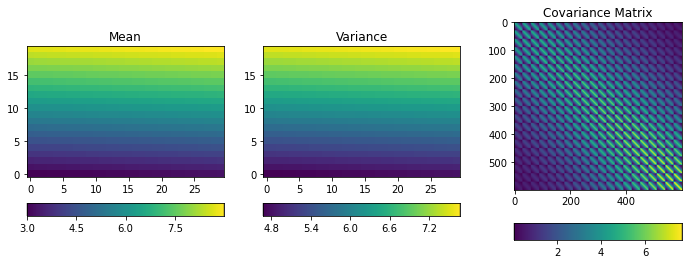

In [4]:
statistics = Statistics.Statistics(simulator)
mean, cov = prior(grid=grid, phi=2.0)
statistics.set(mean, cov)
statistics.plot()


### Observations for assimilation

In [5]:
observation = Simulator.Observation(simulator)
obs = observation.value

### Filtering

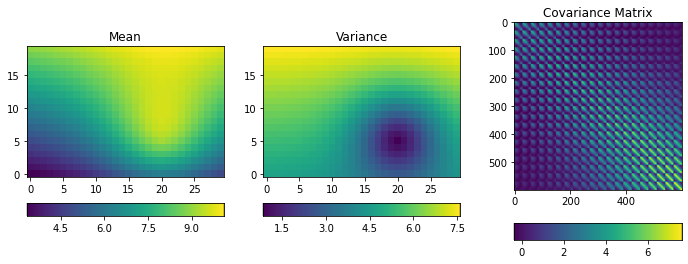

In [6]:
kalman = KalmanFilter.Kalman(simulator, observation, statistics)

mean, cov = simulator.forecast(mean, cov)
mean, cov = kalman.filter(mean, cov, obs)
statistics.plot()

### Forward run with advection diffusion

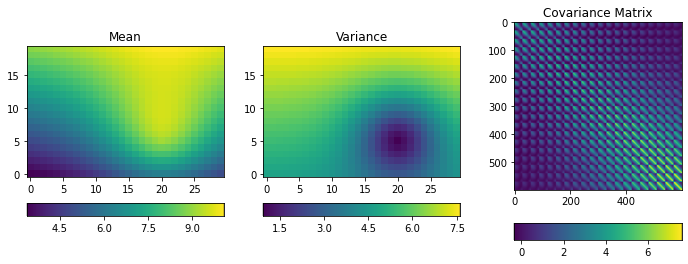

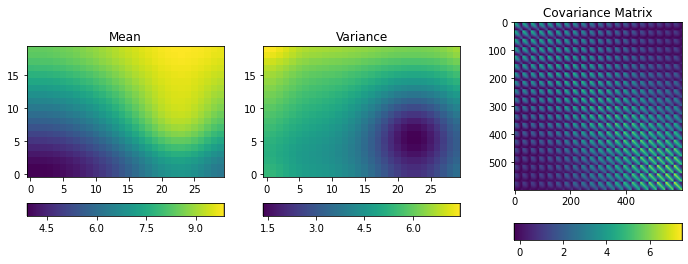

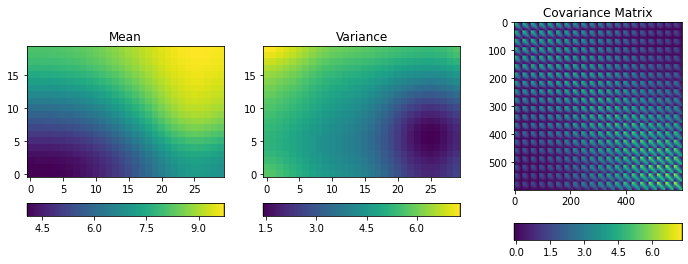

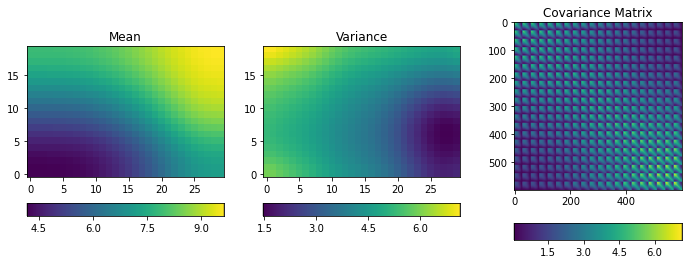

In [8]:
simulator = Simulator.Simulator(grid)
for t in range(151):
    mean, cov = simulator.forecast(mean, cov)
    if t%50 == 0:
        statistics.set(mean, cov)
        statistics.plot()